# **Import Libraries** 

In [31]:
import os
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# **Load your dataset**

In [32]:
# List all files in the dataset directory
data_path = "/kaggle/input/"
os.listdir(data_path)

# Load your dataset 
file_path = "/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# **Dataset Details**

In [33]:
df.describe()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

(6607, 20)

# **Check Missing Values**

In [34]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

# **Data Preprocessing**

In [35]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

**Heatmap**

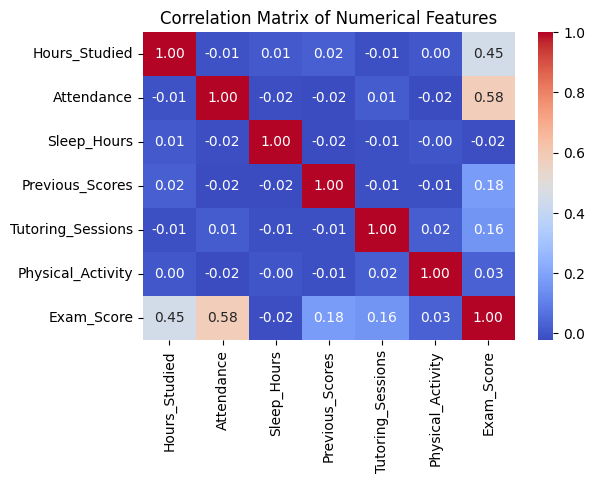

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

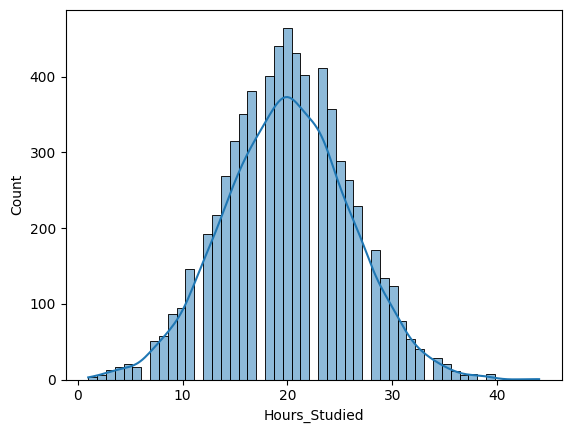

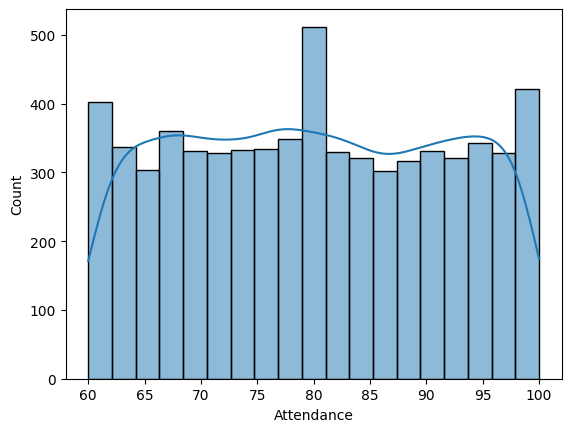

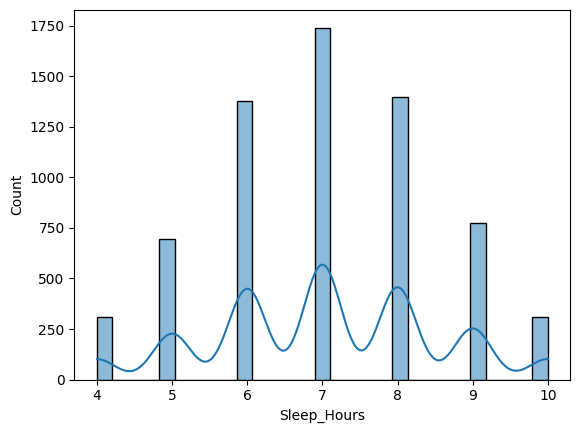

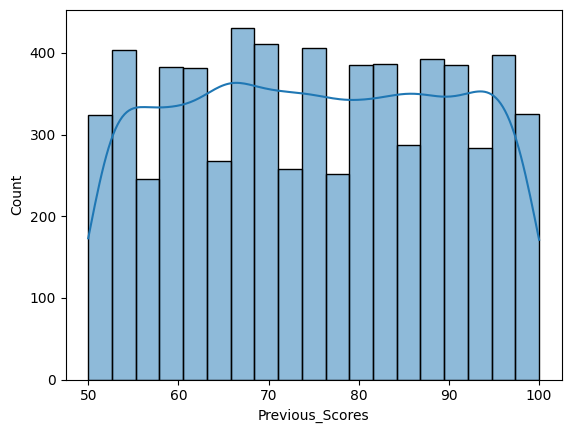

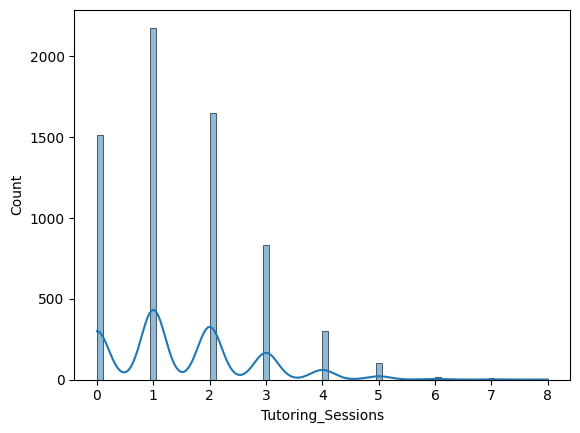

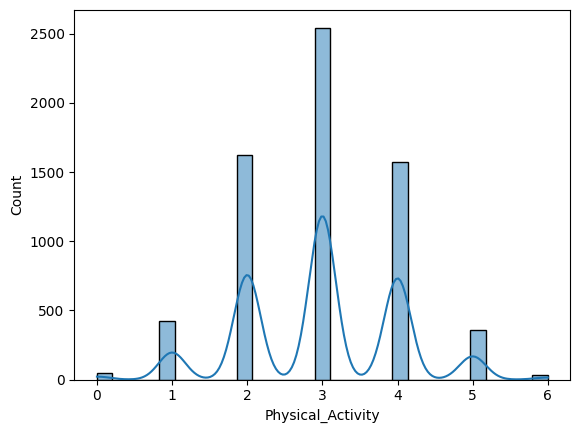

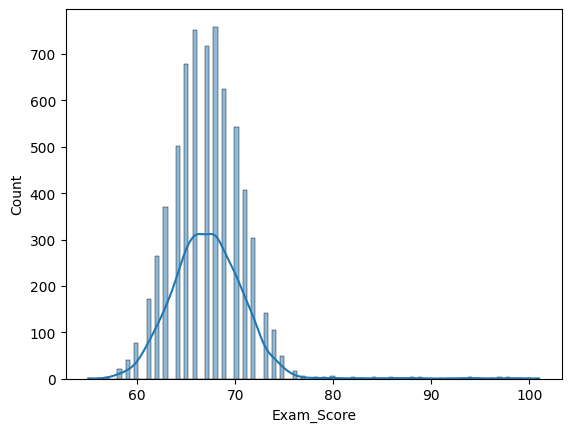

In [37]:
for col in df:
    if df[col].dtype != 'O':
        sns.histplot(df[col],kde=True)
        plt.show()

# **Label Encoder**

In [38]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
  print(df[column].unique())

['Low' 'Medium' 'High']
['High' 'Medium' 'Low']
['No' 'Yes']
['Low' 'Medium' 'High']
['Yes' 'No']
['Low' 'Medium' 'High']
['Medium' 'High' 'Low' nan]
['Public' 'Private']
['Positive' 'Negative' 'Neutral']
['No' 'Yes']
['High School' 'College' 'Postgraduate' nan]
['Near' 'Moderate' 'Far' nan]
['Male' 'Female']


In [39]:
for column in categorical_columns:
  print("Column: ",df[column].value_counts())

Column:  Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Column:  Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
Column:  Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
Column:  Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
Column:  Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
Column:  Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
Column:  Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
Column:  School_Type
Public     4598
Private    2009
Name: count, dtype: int64
Column:  Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64
Column:  Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64
Column:  Parental_Education_Level
High School     3223
College         1989
Postgraduate  

In [40]:
from sklearn.preprocessing import LabelEncoder

# Ordinal columns: have a natural order (Low < Medium < High, etc.)
ordinal_columns = [
    'Parental_Involvement',      # Low < Medium < High
    'Access_to_Resources',       # Low < Medium < High
    'Motivation_Level',          # Low < Medium < High
    'Family_Income',             # Low < Medium < High
    'Teacher_Quality',           # Low < Medium < High
    'Parental_Education_Level',  # High School < College < Postgraduate
    'Distance_from_Home'         # Near < Moderate < Far
]

# Nominal columns: no natural order (categories are just names)
nominal_columns = [
    'Extracurricular_Activities',  # Yes, No
    'Internet_Access',             # Yes, No
    'School_Type',                 # Public, Private
    'Peer_Influence',              # Positive, Neutral, Negative
    'Learning_Disabilities',       # Yes, No
    'Gender'                       # Male, Female
]

df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

# Create a LabelEncoder object
label_encoder = LabelEncoder()
for column in ordinal_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,...,1,2,67,False,True,True,False,True,False,True
1,19,64,1,2,8,59,1,2,2,2,...,0,1,61,False,True,True,False,False,False,False
2,24,98,2,2,7,91,2,2,2,2,...,2,2,74,True,True,True,True,False,False,True
3,29,89,1,2,8,98,2,1,2,2,...,1,1,71,True,True,True,False,False,False,True
4,19,92,2,2,6,65,2,3,2,0,...,0,2,70,True,True,True,True,False,False,False


**Label Encoder Shape**

In [41]:
df = df[df['Exam_Score']<=100]
df.shape

(6606, 21)

**Removing outliers**

In [42]:
# Removing outliers from dataset based on the Z-score method

z = np.abs((df - df.mean()) / df.std())
threshold = 3
df= df[(z < threshold).all(axis=1)]

**Train_Test_Split**

In [43]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Applying Linear Regression**

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"{model.__class__.__name__}:")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

LinearRegression:
MAE: 0.89
R-squared: 0.89


# **Linear Polynomial Regression**

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [47]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("PolynomialRegression")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

PolynomialRegression
MAE: 0.35
R-squared: 0.98


In [49]:
y_train_pred = model.predict(X_train_poly)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("PolynomialRegression (Training Data):")
print(f"MAE: {mae_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

print("\nPolynomialRegression (Test Data):")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

PolynomialRegression (Training Data):
MAE: 0.34
R-squared: 0.98

PolynomialRegression (Test Data):
MAE: 0.35
R-squared: 0.98


# **Task 1: Student Score Prediction**

-----------------#############-----------------#############-----------------

# **🎯 1. Problem Definition**

Goal: Predict a student’s exam score (like total marks or math score) based on input features: study hours, past performance, demographic or categorical variables (e.g. gender, parental education).

Task type: Regression if predicting a continuous score.

# **2. Data Loading & Overview**

Dataset: CSV file including features such as student demographics, study time, previous test prep, and exam score.

First step: Inspect the dataset shape, columns, and sample rows to understand feature types and target variable.

# **3. Data Quality Checks**

Missing Values: Assess whether any columns contain null/missing entries.

Duplicates: Detect duplicate rows that may skew modeling.

Data Types: Identify columns as numeric (e.g., hours, prior scores) versus categorical/object (e.g., gender, education).

Unique Values: List distinct categories for each categorical variable to assess consistency.

# **4. Descriptive Statistics & Visualization**

Numerical Features:

Compute mean, median, standard deviation, min/max of study hours and scores.

Skewness, distribution range (e.g., most math scores cluster around 60–80).

Categorical Features:

Frequency counts or proportion for categories like gender, race, or test-prep status.

Visual tools: bar plots or pie charts to reveal balance of categories.

# **5. Relationship Analysis**

Numerical vs. Target:

Plot study hours vs. score to see positive correlation (usually, more study time → higher scores).

Categorical vs. Target:

Average exam score across demographic groups (e.g. parental education or lunch type).

Identify patterns—e.g. higher scores among students whose parents have advanced degrees.

# **6. Feature Definition & Transformation**

Select Inputs “X”: all predictors excluding the target score.

Target Variable “y”: e.g. math score or total score.

Split Features:

Numeric features (e.g. hours).

Categorical features (e.g. gender, parental education).

Transformations:

Scale numeric features (e.g. z‑score normalization).

Encode categorical variables (e.g. One‑Hot Encoding for test preparation status, etc.).

# **7. Train‑Test Split**

Randomly split dataset into training (~80%) and testing (~20%) to evaluate model generalization.

# **8. Model Training & Evaluation**

Train multiple regression models:

Linear Regression (standard least-squares)

Regularized models: LASSO

Tree-based/ensemble models: Decision Tree, Random Forest, Gradient Boosting, XGB, CatBoost, AdaBoost

Possibly K-Nearest Neighbors Regressor, SVR

Use consistent evaluation metrics across each:

MAE, MSE, RMSE, R² score.

# **9. Hyperparameter Tuning**

Apply techniques like Grid Search or Randomized Search with cross-validation (e.g. 5-fold CV).

Tune model-specific parameters (e.g. tree depth, number of estimators, learning rates).

Select best configuration based on validation R² or MAE.

# **10. Model Comparison & Selection**

Compare all models (with default and tuned hyperparameters) based on test-set metrics.

Present in tabular form: model name vs. MAE/R² etc.

Usually, Linear Regression or one of the ensemble models yields highest R² (e.g. ~0.88 or higher).

# **11. Visualization of Predictions**

Plot actual vs predicted scores (e.g. scatter or regression line).

Tabulate differences between actual and predicted values to assess consistency or bias.

# **13. Conclusions & Takeaways**

Summarize:

No missing or duplicate data.

Strong predictive power (e.g. R² around 0.88, low MAE).

Certain features (like parental education, study hours) show stronger influence.

Reflections:

Linear regression may outperform others with this dataset.

Potential future work: collect more features, test different targets, or perform bias/fairness analysis.


**🔍 Conclusion:**

| Metric        | Value      | Verdict        |
| ------------- | ---------- | -------------- |
| MAE           | \~0.35     | Very low error |
| R² Score      | 0.98       | Excellent fit  |
| Train vs Test | Very close | No overfitting |
